# Plotting the Climate Data by AEZ and Month

This code comes from https://github.com/digitalearthafrica/thematic-layers/tree/main/CHPclim rainfall_AEZ.py and the climate data were retrieved using chpclim_download_and_cog.sh

In [1]:
import sys
import xarray as xr
import geopandas as gpd
from rasterio.features import rasterize
from affine import Affine
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

## Plotting the valid/clear obersvations

In [2]:
valid_pts = {}
def sort_for_plot(aez_name):
    CEO = f'../Results/WOfS_Assessment/Point_Based/{aez_name}_S2_WOfS.csv'
    input_data = pd.read_csv(CEO,delimiter=",")
    input_data=input_data.drop(['Unnamed: 0'], axis=1)
    input_data['CL_OBS_count'] = input_data.groupby('MONTH')['CLEAR_OBS'].transform('count')
    sorted_data = input_data.sort_values(['MONTH'])
    for_plot = sorted_data[~sorted_data.MONTH.duplicated(keep='first')]
    valid_pts[aez_name] = for_plot.CL_OBS_count.values

In [3]:
sort_for_plot('Indian_ocean')
sort_for_plot('Central')
sort_for_plot('Sahel')
sort_for_plot('Southern')
sort_for_plot('Northern')
sort_for_plot('Eastern')
sort_for_plot('Western')

In [4]:
valid_pts

{'Indian_ocean': array([237, 259, 285, 289, 273, 287, 284, 283, 266, 285, 288, 284]),
 'Central': array([127,  95,  74,  42, 127, 184, 137, 134,  83,  94,  78,  83]),
 'Sahel': array([134, 102, 162, 135, 112,  97,  50,  82,  63,  80, 154, 172]),
 'Southern': array([223, 105, 146, 121, 229, 310, 268, 275, 246, 242, 197, 192]),
 'Northern': array([102,  44,  81, 150,  98,  96,  95, 146, 132, 111, 116, 124]),
 'Eastern': array([338, 318, 261, 294, 372, 337, 341, 371, 388, 362, 319, 328]),
 'Western': array([200, 137, 210,  78,  40,  25,  11,  25,  12,  60, 146, 191])}

In [5]:
df_valid = pd.DataFrame.from_dict(valid_pts)
df_valid.to_csv('../Results/WOfS_Assessment/Point_Based/Africa_s2_monthly_valid.csv')

In [6]:
months = np.arange(1,13)

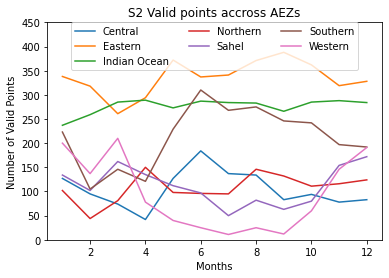

In [11]:
plt.plot(months, valid_pts['Central'], label='Central')
plt.plot(months, valid_pts['Eastern'], label='Eastern')
plt.plot(months, valid_pts['Indian_ocean'], label='Indian Ocean')
plt.plot(months, valid_pts['Northern'], label='Northern')
plt.plot(months, valid_pts['Sahel'], label='Sahel')
plt.plot(months, valid_pts['Southern'], label='Southern')
plt.plot(months, valid_pts['Western'], label='Western')
plt.ylim(0,450)
plt.legend(ncol=3, loc='upper center', borderaxespad=0.)
plt.title('S2 Valid points accross AEZs')
plt.xlabel('Months')
plt.ylabel('Number of Valid Points')
plt.savefig('All_AEZ_valid_S2.png')

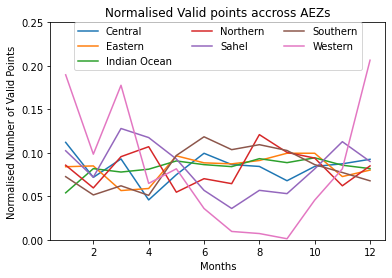

In [8]:
plt.plot(months, valid_pts['Central']/sum(valid_pts['Central']), label='Central')
plt.plot(months, valid_pts['Eastern']/sum(valid_pts['Eastern']), label='Eastern')
plt.plot(months, valid_pts['IndianOcean']/sum(valid_pts['IndianOcean']), label='Indian Ocean')
plt.plot(months, valid_pts['Northern']/sum(valid_pts['Northern']), label='Northern')
plt.plot(months, valid_pts['Sahel']/sum(valid_pts['Sahel']), label='Sahel')
plt.plot(months, valid_pts['Southern']/sum(valid_pts['Southern']), label='Southern')
plt.plot(months, valid_pts['Western']/sum(valid_pts['Western']), label='Western')
plt.ylim(0,0.25)
plt.legend(ncol=3, loc='upper center', borderaxespad=0.)
plt.title('Normalised Valid points accross AEZs')
plt.xlabel('Months')
plt.ylabel('Normalised Number of Valid Points')
plt.savefig('All_AEZ_valid_norm.png')

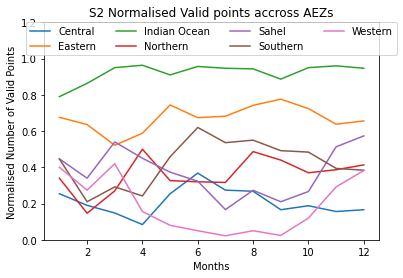

In [12]:
plt.plot(months, valid_pts['Central']/500, label='Central')
plt.plot(months, valid_pts['Eastern']/500, label='Eastern')
plt.plot(months, valid_pts['Indian_ocean']/300, label='Indian Ocean')
plt.plot(months, valid_pts['Northern']/300, label='Northern')
plt.plot(months, valid_pts['Sahel']/300, label='Sahel')
plt.plot(months, valid_pts['Southern']/500, label='Southern')
plt.plot(months, valid_pts['Western']/500, label='Western')
plt.ylim(0,1.2)
plt.legend(ncol=4, loc='upper center', borderaxespad=0.)
plt.title('S2 Normalised Valid points accross AEZs')
plt.xlabel('Months')
plt.ylabel('Normalised Number of Valid Points')
plt.savefig('All_AEZ_valid_total_norm_S2.png')